# 2019 Kaggle Data Science and Machine Learning Survey

**2019 Kaggle Machine Learning and Data Science Survey**


* The 2019 Kaggle Machine Learning and Data Science Survey finished with 19,717 responses.
* Countries with fewer than 50 responses were grouped into the category "other" and are not present on the map below.

In [1]:
# Import Python packages

import os
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', 5000)
import seaborn as sns
import plotly.graph_objs as go
import warnings 
warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True)

# Define Helper Functions

def loadCSV(base_dir,file_name):
    """Loads a CSV file into a Pandas DataFrame"""
    file_path = os.path.join(base_dir,file_name)
    df = pd.read_csv(file_path)
    return df

# Load Data

base_dir = '/kaggle/input/kaggle-survey-2019/'
survey_schema = loadCSV(base_dir,'survey_schema.csv')
multiple_choice = loadCSV(base_dir,'multiple_choice_responses.csv')
responses_only = multiple_choice[1:]
response_counts = survey_schema[1:2]
response_counts.drop(['2019 Kaggle Machine Learning and Data Science Survey'], inplace=True, axis=1)
question_numbers = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12',
                 'Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23',
                 'Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34']
response_counts = response_counts.reindex(question_numbers,axis=1)

In [2]:
def return_count(data,question_part):
    """Counts occurences of each value in a given column"""
    counts = data[question_part].value_counts()
    counts_df = pd.DataFrame(counts)
    return counts_df

def return_percentage(data,question_part):
    """Calculates percent of each value in a given column"""
    counts = data[question_part].value_counts()
    total = int(response_counts[question_number])
    percentage = (counts*100)/total
    value = [percentage]
    question = [data[question_part]][0]
    percentage_df = pd.DataFrame(data=value).T     
    return percentage_df

def return_percentage_multiple_choice_multiple_choice_selection(data,question_part,response_counts,question_number):
    """Calculates percent of each value in a given column for multiple choice multiple selection questions"""
    counts = data[question_part].value_counts()
    total = int(response_counts[question_number])
    percentage = (counts*100)/total
    value = [percentage]
    question = [data[question_part]][0]
    percentage_df = pd.DataFrame(data=value).T 
    return percentage_df

def plot_multiple_choice(question_number,data,data_with_question_on_top,
                         title,y_axis_title,percent_instead_of_count):
    """Plot multiple choice questions sorted by total percent of responses"""
    print(question_number,':',data_with_question_on_top[question_number][0])
    if percent_instead_of_count == True:
        df = return_percentage(data, question_number)
    else:
        df = return_count(data, question_number)
    trace1 = go.Bar(
                    x = df.index,
                    y = df[question_number][0:10],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df.index)
    data = [trace1]
    layout = go.Layout(barmode = "group",title=title, 
                       yaxis= dict(title=y_axis_title),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
      
def plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,
                                  sorting_order_list,percent_instead_of_count):
    """Plot multiple choice questions sorted in the order that you prefer"""
    print(question_number,':',data_with_question_on_top[question_number][0])
    if percent_instead_of_count == True:
        df = return_percentage(data, question_number)
    else:
        df = return_count(data, question_number)
    trace1 = go.Bar(
                    x = df.index,
                    y = df[question_number],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df.index)
    data = [trace1]
    layout = go.Layout(barmode = "group",title=title, 
                       xaxis=dict(type='category',categoryorder='array',categoryarray=sorting_order_list), 
                       yaxis= dict(title=y_axis_title),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    

def plot_multiple_choice_5_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                               question_part_1,question_part_2,question_part_3,question_part_4,question_part_5,
                                               percent_instead_of_count = True):
    """Plot multiple selection multiple choice question with 5 options"""
    print(question_number,':',data_with_question_on_top[question_part_1][0])
    
    if percent_instead_of_count == True:
        df1 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_1, response_counts, question_number)
        df2 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_2, response_counts, question_number)
        df3 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_3, response_counts, question_number)
        df4 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_4, response_counts, question_number)
        df5 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_5, response_counts, question_number)
    else:
        df1 = return_count(data, question_part_1)
        df2 = return_count(data, question_part_2)
        df3 = return_count(data, question_part_3)
        df4 = return_count(data, question_part_4)
        df5 = return_count(data, question_part_5)

    trace1 = go.Bar(
                    x = df1.index,
                    y = df1[question_part_1],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df1.index)
    trace2 = go.Bar(
                    x = df2.index,
                    y = df2[question_part_2],
                   name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df2.index)    
    trace3 = go.Bar(
                    x = df3.index,
                    y = df3[question_part_3],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df3.index)   
    trace4 = go.Bar(
                    x = df4.index,
                    y = df4[question_part_4],
                   name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df4.index)   
    trace5 = go.Bar(
                    x = df5.index,
                    y = df5[question_part_5],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df5.index)   
    data = [trace1,trace2,trace3,trace4,trace5]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=y_axis_title),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

def plot_multiple_choice_6_multiple_selections(data,data_with_question_on_top,title,y_axis_title,
                                               question_number,question_part_1,question_part_2,question_part_3,
                                               question_part_4,question_part_5,question_part_6,
                                               percent_instead_of_count):
    """Plot multiple selection multiple choice question with 7 options"""
    print(question_number,':',data_with_question_on_top[question_part_1][0])
    if percent_instead_of_count == True:
        df1 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_1, response_counts, question_number)
        df2 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_2, response_counts, question_number)
        df3 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_3, response_counts, question_number)
        df4 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_4, response_counts, question_number)
        df5 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_5, response_counts, question_number)
        df6 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_6, response_counts, question_number)
    else:
        df1 = return_count(data, question_part_1)
        df2 = return_count(data, question_part_2)
        df3 = return_count(data, question_part_3)
        df4 = return_count(data, question_part_4)
        df5 = return_count(data, question_part_5)
        df6 = return_count(data, question_part_6)
    trace1 = go.Bar(
                    x = df1.index,
                    y = df1[question_part_1],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df1.index)
    trace2 = go.Bar(
                    x = df2.index,
                    y = df2[question_part_2],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df2.index)    
    trace3 = go.Bar(
                    x = df3.index,
                    y = df3[question_part_3],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df3.index)   
    trace4 = go.Bar(
                    x = df4.index,
                    y = df4[question_part_4],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df4.index)   
    trace5 = go.Bar(
                    x = df5.index,
                    y = df5[question_part_5],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df5.index)       
    trace6 = go.Bar(
                    x = df6.index,
                    y = df6[question_part_6],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df6.index)     
    data = [trace1,trace2,trace3,trace4,trace5,trace6]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=y_axis_title),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    
def plot_multiple_choice_7_multiple_selections(data,data_with_question_on_top,title,y_axis_title,
                                               question_number,question_part_1,question_part_2,question_part_3,
                                               question_part_4,question_part_5,question_part_6,question_part_7,
                                               percent_instead_of_count):
    """Plot multiple selection multiple choice question with 7 options"""
    print(question_number,':',data_with_question_on_top[question_part_1][0])
    if percent_instead_of_count == True:
        df1 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_1, response_counts, question_number)
        df2 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_2, response_counts, question_number)
        df3 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_3, response_counts, question_number)
        df4 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_4, response_counts, question_number)
        df5 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_5, response_counts, question_number)
        df6 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_6, response_counts, question_number)
        df7 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_7, response_counts, question_number)
    else:
        df1 = return_count(data, question_part_1)
        df2 = return_count(data, question_part_2)
        df3 = return_count(data, question_part_3)
        df4 = return_count(data, question_part_4)
        df5 = return_count(data, question_part_5)
        df6 = return_count(data, question_part_6)
        df7 = return_count(data, question_part_7)
    trace1 = go.Bar(
                    x = df1.index,
                    y = df1[question_part_1],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df1.index)
    trace2 = go.Bar(
                    x = df2.index,
                    y = df2[question_part_2],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df2.index)    
    trace3 = go.Bar(
                    x = df3.index,
                    y = df3[question_part_3],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df3.index)   
    trace4 = go.Bar(
                    x = df4.index,
                    y = df4[question_part_4],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df4.index)   
    trace5 = go.Bar(
                    x = df5.index,
                    y = df5[question_part_5],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df5.index)       
    trace6 = go.Bar(
                    x = df6.index,
                    y = df6[question_part_6],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df6.index)     
    trace7 = go.Bar(
                    x = df7.index,
                    y = df7[question_part_7],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df7.index)   
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=y_axis_title),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

def plot_multiple_choice_8_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                               question_part_1,question_part_2,question_part_3,question_part_4,
                                               question_part_5,question_part_6,question_part_7,question_part_8,
                                               percent_instead_of_count):
    """Plot multiple selection multiple choice question with 8 options"""    
    print(question_number,':',data_with_question_on_top[question_part_1][0])
    if percent_instead_of_count == True:
        df1 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_1, response_counts, question_number)
        df2 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_2, response_counts, question_number)
        df3 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_3, response_counts, question_number)
        df4 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_4, response_counts, question_number)
        df5 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_5, response_counts, question_number)
        df6 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_6, response_counts, question_number)
        df7 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_7, response_counts, question_number)
        df8 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_8, response_counts, question_number)
    else:
        df1 = return_count(data, question_part_1)
        df2 = return_count(data, question_part_2)
        df3 = return_count(data, question_part_3)
        df4 = return_count(data, question_part_4)
        df5 = return_count(data, question_part_5)
        df6 = return_count(data, question_part_6)
        df7 = return_count(data, question_part_7)
        df8 = return_count(data, question_part_8)
    trace1 = go.Bar(
                    x = df1.index,
                    y = df1[question_part_1],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df1.index)
    trace2 = go.Bar(
                    x = df2.index,
                    y = df2[question_part_2],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df2.index)    
    trace3 = go.Bar(
                    x = df3.index,
                    y = df3[question_part_3],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df3.index)   
    trace4 = go.Bar(
                    x = df4.index,
                    y = df4[question_part_4],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df4.index)   
    trace5 = go.Bar(
                    x = df5.index,
                    y = df5[question_part_5],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df5.index)       
    trace6 = go.Bar(
                    x = df6.index,
                    y = df6[question_part_6],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df6.index)     
    trace7 = go.Bar(
                    x = df7.index,
                    y = df7[question_part_7],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df7.index)
    trace8 = go.Bar(
                    x = df8.index,
                    y = df8[question_part_8],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df8.index)   
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=y_axis_title),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
     
    

def plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                                question_part_1,question_part_2,question_part_3,question_part_4,
                                                question_part_5,question_part_6,question_part_7,question_part_8,
                                                question_part_9,question_part_10,question_part_11,
                                                question_part_12,percent_instead_of_count):
    """Plot multiple selection multiple choice question with 10 options"""    
    print(question_number,':',data_with_question_on_top[question_part_1][0])
    if percent_instead_of_count == True:
        df1 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_1, response_counts, question_number)
        df2 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_2, response_counts, question_number)
        df3 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_3, response_counts, question_number)
        df4 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_4, response_counts, question_number)
        df5 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_5, response_counts, question_number)
        df6 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_6, response_counts, question_number)
        df7 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_7, response_counts, question_number)
        df8 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_8, response_counts, question_number)
        df9 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_9, response_counts, question_number)
        df10 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_10, response_counts, question_number)
        df11 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_11, response_counts, question_number)
        df12 = return_percentage_multiple_choice_multiple_choice_selection(data, question_part_12, response_counts, question_number)
    else:
        df1 = return_count(data, question_part_1)
        df2 = return_count(data, question_part_2)
        df3 = return_count(data, question_part_3)
        df4 = return_count(data, question_part_4)
        df5 = return_count(data, question_part_5)
        df6 = return_count(data, question_part_6)
        df7 = return_count(data, question_part_7)
        df8 = return_count(data, question_part_8)
        df9 = return_count(data, question_part_9)
        df10 = return_count(data, question_part_10)
        df11 = return_count(data, question_part_11)
        df12 = return_count(data, question_part_12)
    trace1 = go.Bar(
                    x = df1.index,
                    y = df1[question_part_1],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df1.index)
    trace2 = go.Bar(
                    x = df2.index,
                    y = df2[question_part_2],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df2.index)    
    trace3 = go.Bar(
                    x = df3.index,
                    y = df3[question_part_3],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df3.index)   
    trace4 = go.Bar(
                    x = df4.index,
                    y = df4[question_part_4],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df4.index)   
    trace5 = go.Bar(
                    x = df5.index,
                    y = df5[question_part_5],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df5.index)       
    trace6 = go.Bar(
                    x = df6.index,
                    y = df6[question_part_6],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df6.index)     
    trace7 = go.Bar(
                    x = df7.index,
                    y = df7[question_part_7],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df7.index)
    trace8 = go.Bar(
                    x = df8.index,
                    y = df8[question_part_8],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df8.index)   
    trace9 = go.Bar(
                    x = df9.index,
                    y = df9[question_part_9],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df9.index)   
    trace10 = go.Bar(
                    x = df10.index,
                    y = df10[question_part_10],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df10.index)   
    trace11 = go.Bar(
                    x = df11.index,
                    y = df11[question_part_11],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df11.index)   
    trace12 = go.Bar(
                    x = df12.index,
                    y = df12[question_part_12],
                    name = "Kaggle Survey 2019",
                    marker = dict(color = 'blue',
                                 line=dict(color='black',width=1.5)),
                    text = df12.index)   
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=y_axis_title),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    
# Another plotting function
# This function was adapted from https://www.kaggle.com/artgor/russia-usa-india-and-other-countries

def plot_country_one_var(df_choice, var='', title_name=''):
    data = []
    for j, c in enumerate(df_choice['Q3_In which country do you currently reside?'].unique()):
        grouped = df_choice.loc[df_choice['Q3_In which country do you currently reside?'] == c,
                                var].value_counts().sort_index()
        grouped = grouped / grouped.sum()
        if var == 'Q10_What is your current yearly compensation (approximate $USD)?':
            map_dict = {"$0-999": 0,
                        "1,000-1,999": 1,
                        "2,000-2,999": 2,
                        "3,000-3,999": 3,
                        "4,000-4,999": 4,
                        "5,000-7,499": 5,
                        "7,500-9,999": 6,
                        "10,000-14,999": 7,
                        "15,000-19,999": 8,
                        "20,000-24,999": 9,
                        "25,000-29,999": 10,
                        "30,000-39,999": 11,
                        "40,000-49,999": 12,
                        "50,000-59,999": 13,
                        "60,000-69,999": 14,
                        "70,000-79,999": 15,
                        "80,000-89,999": 16,
                        "90,000-99,999": 17,
                        "100,000-124,999": 18,
                        "125,000-149,999": 19,
                        "150,000-199,999": 20,
                        "200,000-249,999": 21,
                        "250,000-299,999": 22,
                        "300,000-500,000": 23,
                        "> $500,000": 24}
            grouped = grouped.reset_index()
            grouped.columns = ['salary', 'counts']
            grouped['sorting'] = grouped['salary'].apply(lambda x: map_dict[x])
            grouped = grouped.sort_values('sorting', ascending=True)
            trace = go.Bar(
                x=grouped['salary'],
                y=grouped['counts'],
                name=c,
                marker=dict(color=j),
                showlegend=True
            )
            data.append(trace)
        else:
            trace = go.Bar(
                x=grouped.index,
                y=grouped.values,
                name=c,
                marker=dict(color=j),
                showlegend=True
            )
            data.append(trace)    
    fig = go.Figure(data=data)
    fig['layout'].update(title=f'{title_name} Grouped by Country', barmode='group');
    return fig


def plot_map(country_count):
    data = [ dict(
            type = 'choropleth',
            locations = country_count['code'],
            z = country_count['people'],
            text = country_count['country'],
            colorscale = 'Viridis',
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'rgb(180,180,180)',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = 'Responders'),
          ) ]

    layout = dict(
        title = 'Number of Responses Per Country',
        annotations = [dict(
            x=0,
            y=0.05,
            xref='paper',
            yref='paper',
            text='<a href="https://www.kaggle.com/artgor/russia-usa-india-and-other-countries/">\
                This map is an adapation of work shared by @artgor during the 2018 Kaggle DS & ML Challenge</a>',
            showarrow = False)],
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )
    fig = dict(data=data, layout=layout )
    iplot(fig, validate=False, filename='d3-world-map' )


In [3]:
# Create Choropleth Map

# Adapted from https://www.kaggle.com/artgor/russia-usa-india-and-other-countries/
DIR = '/kaggle/input/kaggle-survey-2019/'
df_choice = pd.read_csv(DIR + 'multiple_choice_responses.csv', low_memory=False, header=[0,1])
df_choice.columns = ['_'.join(col) for col in df_choice.columns]
country_count = df_choice['Q3_In which country do you currently reside?'].value_counts().reset_index()
country_count.columns = ['country', 'people']
country_count.loc[country_count['country'] == 'United States of America', 'country'] = 'United States'
country_count.loc[country_count['country'] == 'United Kingdom of Great Britain and Northern Ireland', 'country'] = 'United Kingdom'
country_count.loc[country_count['country'] == 'South Korea', 'country'] = '"Korea, South"'
country_count.loc[country_count['country'] == 'Viet Nam', 'country'] = 'Vietnam'
country_count.loc[country_count['country'] == 'Iran, Islamic Republic of...', 'country'] = 'Iran'
country_count.loc[country_count['country'] == 'Hong Kong (S.A.R.)', 'country'] = 'Hong Kong'
country_count.loc[country_count['country'] == 'Republic of Korea', 'country'] = '"Korea, North"'
country_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_code.columns = [i.lower() for i in country_code.columns]
country_count = pd.merge(country_count, country_code, on='country')
plot_map(country_count)

In [4]:
# Count Responses

print('Total Number of Responses: ',responses_only.shape[0])
responses_only2 = pd.DataFrame(pd.to_numeric(responses_only['Time from Start to Finish (seconds)'], errors='coerce'))
responses_only2 = responses_only2[responses_only2['Time from Start to Finish (seconds)'] > 299]  
print('Total Number of Respondents That Took More Than 5 Minutes: ',responses_only2.shape[0])

Total Number of Responses:  19717
Total Number of Respondents That Took More Than 5 Minutes:  15686


**A Quick EDA of All 34 Questions:**

In [5]:
in_order = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69']
data = responses_only
data_with_question_on_top = multiple_choice
y_axis_title='Percent of Respondents'
question_number = 'Q1'
title='Percent of Respondents per Age'
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q1 : What is your age (# years)?


In [6]:
question_number = 'Q2'
title='Percent of Respondents per Gender'
plot_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,percent_instead_of_count=True)

Q2 : What is your gender? - Selected Choice


In [7]:
print('Countries with fewer than 50 respondents were grouped into category "other".  This reduced the number of countries from 171 to 59.')
question_number = 'Q3'
title='Percent of Respondents per Country'
plot_multiple_choice(question_number,data,data_with_question_on_top, title,y_axis_title,percent_instead_of_count=True)

Countries with fewer than 50 respondents were grouped into category "other".  This reduced the number of countries from 171 to 59.
Q3 : In which country do you currently reside?


In [8]:
data = responses_only
data_with_question_on_top = multiple_choice
y_axis_title='Percent of Respondents'
in_order = ["No formal education past high school","Some college/university study without earning a bachelor’s degree",
            "Bachelor’s degree","Master’s degree","Doctoral degree", "Professional degree","I prefer not to answer"]
question_number = 'Q4'
title='Percent of Respondents per Education Level'
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q4 : What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


In [9]:
question_number = 'Q5'
title='Percent of Respondents per Job Title'
plot_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,percent_instead_of_count=True)

Q5 : Select the title most similar to your current role (or most recent title if retired): - Selected Choice


In [10]:
question_number = 'Q6'
title='Percent of Respondents per Employer Size'
in_order = ["0-49 employees","50-249 employees","250-999 employees","1000-9,999 employees","> 10,000 employees"]
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q6 : What is the size of the company where you are employed?


In [11]:
df_choice['Q3_orig'] = df_choice['Q3_In which country do you currently reside?']
df_choice.loc[df_choice['Q3_In which country do you currently reside?'].isin(['United States of America', 'Russia', 'India','Germany','Japan','Brazil']) == False,
              'Q3_In which country do you currently reside?'] = 'Other'
var_name = dict([('Q29', 'cloud computing service'),('Q28', 'ML framework')])
cols2 = ['Q29','Q28']
print('Q6 : What is the size of the company where you are employed?\n')
print('The plot below was adapted from work shared by @artgor during the 2018 Kaggle DS & ML Challenge (see link at top of kernel)')
fig = plot_country_one_var(df_choice=df_choice, var='Q5_Select the title most similar to your current role (or most recent title if retired): - Selected Choice', title_name='Job Title')
iplot(fig);

Q6 : What is the size of the company where you are employed?

The plot below was adapted from work shared by @artgor during the 2018 Kaggle DS & ML Challenge (see link at top of kernel)


In [12]:
question_number = 'Q7'
title='Percent of Respondents per Team Size'
in_order = ["0","1-2","3-4","5-9","10-14","15-19","20+"]
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q7 : Approximately how many individuals are responsible for data science workloads at your place of business?


In [13]:
question_number = 'Q8'
title='Percent of Respondents per ML Adoption Level'
in_order = ['No (we do not use ML methods)',
            'We are exploring ML methods (and may one day put a model into production)',
            'We use ML methods for generating insights (but do not put working models into production)',
            'We recently started using ML methods (i.e., models in production for less than 2 years)',
            'We have well established ML methods (i.e., models in production for more than 2 years)',       
            'I do not know']     
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q8 : Does your current employer incorporate machine learning methods into their business?


In [14]:
question_number = 'Q9'
title='Percent of Respondents per Job Responsibility'
plot_multiple_choice_8_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q9_Part_1',
                                           question_part_2 = 'Q9_Part_3', 
                                           question_part_3 = 'Q9_Part_5', 
                                           question_part_4 = 'Q9_Part_2', 
                                           question_part_5 = 'Q9_Part_4', 
                                           question_part_6 = 'Q9_Part_6',
                                           question_part_7 = 'Q9_Part_7',
                                           question_part_8 = 'Q9_Part_8',
                                           percent_instead_of_count=True)

Q9 : Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions


In [15]:
in_order = ['$0-999',
                        '1,000-1,999',
                        '2,000-2,999',
                        '3,000-3,999',
                        '4,000-4,999',
                        '5,000-7,499',
                        '7,500-9,999',
                        '10,000-14,999',
                        '15,000-19,999',
                        '20,000-24,999',
                        '25,000-29,999',
                        '30,000-39,999',
                        '40,000-49,999',
                        '50,000-59,999',
                        '60,000-69,999',
                        '70,000-79,999',
                        '80,000-89,999',
                        '90,000-99,999',
                        '100,000-124,999',
                        '125,000-149,999',
                        '150,000-199,999',
                        '200,000-249,999',
                        '250,000-299,999',
                        '300,000-500,000',
                        '> $500,000']

question_number = 'Q10'
title='Percent of Respondents per Salary Range'
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q10 : What is your current yearly compensation (approximate $USD)?


In [16]:
print('Q10 : What is your current yearly compensation (approximate $USD)?\n')
print('The plot below was adapted from work shared by @artgor during the 2018 Kaggle DS & ML Challenge (see link at top of kernel)')
fig = plot_country_one_var(df_choice=df_choice, var='Q10_What is your current yearly compensation (approximate $USD)?', title_name='Salary')
iplot(fig);

Q10 : What is your current yearly compensation (approximate $USD)?

The plot below was adapted from work shared by @artgor during the 2018 Kaggle DS & ML Challenge (see link at top of kernel)


In [17]:
question_number = 'Q11'
title='Percent of Respondents per Money Spent'
in_order = ["$0 (USD)","$1-$99","$100-$999","$1000-$9,999",
            "$10,000-$99,999","> $100,000 ($USD)"]
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q11 : Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?


In [18]:
question_number = 'Q12'
title='Percent of Respondents per ML Media Source'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                            question_part_1 = 'Q12_Part_4',
                                            question_part_2 = 'Q12_Part_8',
                                            question_part_3 = 'Q12_Part_6',
                                            question_part_4 = 'Q12_Part_9',
                                            question_part_5 = 'Q12_Part_5',
                                            question_part_6 = 'Q12_Part_1',
                                            question_part_7 = 'Q12_Part_3',
                                            question_part_8 = 'Q12_Part_10',
                                            question_part_9 = 'Q12_Part_7',
                                            question_part_10 = 'Q12_Part_2',
                                            question_part_11 = 'Q12_Part_11',
                                            question_part_12 = 'Q12_Part_12',
                                            percent_instead_of_count=True)                                            

Q12 : Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, blog, social media, etc)


In [19]:
question_number = 'Q13'
title='Percent of Respondents per Learning Platform'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q13_Part_2',
                                            question_part_2 = 'Q13_Part_6',
                                            question_part_3 = 'Q13_Part_8',
                                            question_part_4 = 'Q13_Part_10',
                                            question_part_5 = 'Q13_Part_4',
                                            question_part_6 = 'Q13_Part_3',
                                            question_part_7 = 'Q13_Part_1',
                                            question_part_8 = 'Q13_Part_7',
                                            question_part_9 = 'Q13_Part_9',
                                            question_part_10 = 'Q13_Part_5',
                                            question_part_11 = 'Q13_Part_11',
                                            question_part_12 = 'Q13_Part_12',
                                            percent_instead_of_count=True)

Q13 : On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera


In [20]:
question_number = 'Q14'
title='Percent of Respondents per Most Common Analytics Tool'
in_order = ["Basic statistical software (Microsoft Excel, Google Sheets, etc.)",
       "Advanced statistical software (SPSS, SAS, etc.)",
       "Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",
       "Local development environments (RStudio, JupyterLab, etc.)",
       "Cloud-based data software & APIs (AWS, GCP, Azure, etc.)", "Other"]
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q14 : What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice


In [21]:
question_number = 'Q15'
title='Percent of Respondents per Years Writing Code to Analyze Data'
in_order = ['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']
plot_unsorted_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,in_order,percent_instead_of_count=True)

Q15 : How long have you been writing code to analyze data (at work or at school)?


In [22]:
question_number = 'Q16'
title='Percent of Respondents per IDE'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q16_Part_1',
                                            question_part_2 = 'Q16_Part_6',
                                            question_part_3 = 'Q16_Part_2',
                                            question_part_4 = 'Q16_Part_3',
                                            question_part_5 = 'Q16_Part_9',
                                            question_part_6 = 'Q16_Part_7',
                                            question_part_7 = 'Q16_Part_10', 
                                            question_part_8 = 'Q16_Part_8',
                                            question_part_9 = 'Q16_Part_5', 
                                            question_part_10 = 'Q16_Part_4',
                                            question_part_11 = 'Q16_Part_11',
                                            question_part_12 = 'Q16_Part_12',
                                            percent_instead_of_count=True)

Q16 : Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) 


In [23]:
question_number = 'Q17'
title='Percent of Respondents per Hosted Notebook Product'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                            question_part_1 = 'Q17_Part_1',
                                            question_part_2 = 'Q17_Part_2',
                                            question_part_3 = 'Q17_Part_7',
                                            question_part_4 = 'Q17_Part_4',
                                            question_part_5 = 'Q17_Part_3',
                                            question_part_6 = 'Q17_Part_10',
                                            question_part_7 = 'Q17_Part_8',
                                            question_part_8 = 'Q17_Part_5',
                                            question_part_9 = 'Q17_Part_6',
                                            question_part_10 = 'Q17_Part_9',
                                            question_part_11 = 'Q17_Part_11',
                                            question_part_12 = 'Q17_Part_12',
                                            percent_instead_of_count=True)

Q17 : Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks (Kernels) 


In [24]:
question_number = 'Q18'
title='Percent of Respondents per Programming Language'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q18_Part_1',
                                            question_part_2 = 'Q18_Part_3',
                                            question_part_3 = 'Q18_Part_2',
                                            question_part_4 = 'Q18_Part_6',
                                            question_part_5 = 'Q18_Part_5',
                                            question_part_6 = 'Q18_Part_7', 
                                            question_part_7 = 'Q18_Part_9',
                                            question_part_8 = 'Q18_Part_4',
                                            question_part_9 = 'Q18_Part_10', 
                                            question_part_10 = 'Q18_Part_8',
                                            question_part_11 = 'Q18_Part_11',
                                            question_part_12 = 'Q18_Part_12',
                                            percent_instead_of_count=True)

Q18 : What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python


In [25]:
question_number = 'Q19'
title='Percent of Respondents per Recommended Language to Learn First'
plot_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,percent_instead_of_count=True)

Q19 : What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice


In [26]:
question_number = 'Q20'
title='Percent of Respondents per Data Visualization Library'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q20_Part_2',
                                            question_part_2 = 'Q20_Part_8',
                                            question_part_3 = 'Q20_Part_1',
                                            question_part_4 = 'Q20_Part_6',
                                            question_part_5 = 'Q20_Part_4',
                                            question_part_6 = 'Q20_Part_5',
                                            question_part_7 = 'Q20_Part_7',
                                            question_part_8 = 'Q20_Part_9',
                                            question_part_9 = 'Q20_Part_10',
                                            question_part_10 = 'Q20_Part_3',
                                            question_part_11 = 'Q20_Part_11',
                                            question_part_12 = 'Q20_Part_12',
                                            percent_instead_of_count=True)

Q20 : What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib 


In [27]:
question_number = 'Q21'
title='Percent of Respondents per Specialized Hardware'
plot_multiple_choice_5_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q21_Part_1',
                                           question_part_2 = 'Q21_Part_2',
                                           question_part_3 = 'Q21_Part_3',
                                           question_part_4 = 'Q21_Part_4',
                                           question_part_5 = 'Q21_Part_5',
                                           percent_instead_of_count=True)

Q21 : Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - CPUs


In [28]:
question_number = 'Q22'
title='Percent of Respondents per TPU usage'
plot_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,percent_instead_of_count=True)

Q22 : Have you ever used a TPU (tensor processing unit)?


In [29]:
question_number = 'Q23'
title='Percent of Respondents per Years Using Machine Learning Methods'
plot_multiple_choice(question_number,data,data_with_question_on_top,title,y_axis_title,percent_instead_of_count=True)

Q23 : For how many years have you used machine learning methods?


In [30]:
question_number = 'Q24'
title='Percent of Respondents per Machine Learning Algorithm'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q24_Part_1',
                                            question_part_2 = 'Q24_Part_2',
                                            question_part_3 = 'Q24_Part_3',
                                            question_part_4 = 'Q24_Part_7',
                                            question_part_5 = 'Q24_Part_4',
                                            question_part_6 = 'Q24_Part_9',
                                            question_part_7 = 'Q24_Part_6', 
                                            question_part_8 = 'Q24_Part_8', 
                                            question_part_9 = 'Q24_Part_10', 
                                            question_part_10 = 'Q24_Part_5', 
                                            question_part_11 = 'Q24_Part_11',
                                            question_part_12 = 'Q24_Part_12',
                                            percent_instead_of_count=True)

Q24 : Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression


In [31]:
question_number = 'Q25'
title='Percent of Respondents per AutoML Type'
plot_multiple_choice_8_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                          question_part_1 = 'Q25_Part_1',
                                           question_part_2 = 'Q25_Part_2',
                                           question_part_3 = 'Q25_Part_3',
                                           question_part_4 = 'Q25_Part_4',
                                           question_part_5 = 'Q25_Part_5',
                                           question_part_6 = 'Q25_Part_6',
                                           question_part_7 = 'Q25_Part_7',
                                           question_part_8 = 'Q25_Part_8',
                                           percent_instead_of_count=True)

Q25 : Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)


In [32]:
question_number = 'Q26'
title='Percent of Respondents per Computer Vision Method'
plot_multiple_choice_7_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                          question_part_1 = 'Q26_Part_4',
                                           question_part_2 = 'Q26_Part_1',
                                           question_part_3 = 'Q26_Part_2',
                                           question_part_4 = 'Q26_Part_3',
                                           question_part_5 = 'Q26_Part_6',
                                           question_part_6 = 'Q26_Part_5',
                                           question_part_7 = 'Q26_Part_7',
                                           percent_instead_of_count=True)

Q26 : Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)


In [33]:
question_number = 'Q27'
title='Percent of Respondents per NLP Method'
plot_multiple_choice_6_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                          question_part_1 = 'Q27_Part_1',
                                           question_part_2 = 'Q27_Part_2',
                                           question_part_3 = 'Q27_Part_4',
                                           question_part_4 = 'Q27_Part_3',
                                           question_part_5 = 'Q27_Part_5',
                                           question_part_6 = 'Q27_Part_6',
                                           percent_instead_of_count=True)

Q27 : Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)


In [34]:
question_number = 'Q28'
title='Percent of Respondents per Machine Learning Framework'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q28_Part_1',
                                            question_part_2 = 'Q28_Part_2',
                                            question_part_3 = 'Q28_Part_3',
                                            question_part_4 = 'Q28_Part_4',
                                            question_part_5 = 'Q28_Part_5',
                                            question_part_6 = 'Q28_Part_6',
                                            question_part_7 = 'Q28_Part_8',
                                            question_part_8 = 'Q28_Part_7',
                                            question_part_9 = 'Q28_Part_10',
                                            question_part_10 = 'Q28_Part_9',
                                            question_part_11 = 'Q28_Part_11',
                                            question_part_12 = 'Q28_Part_12',
                                            percent_instead_of_count=True)

Q28 : Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn 


In [35]:
question_number = 'Q29'
title='Percent of Respondents per Cloud Computing Service'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                          question_part_1 = 'Q29_Part_2',
                                           question_part_2 = 'Q29_Part_1',
                                           question_part_3 = 'Q29_Part_3',
                                           question_part_4 = 'Q29_Part_4',
                                           question_part_5 = 'Q29_Part_9', 
                                           question_part_6 = 'Q29_Part_7', 
                                           question_part_7 = 'Q29_Part_6', 
                                            question_part_8 = 'Q29_Part_5',
                                            question_part_9 = 'Q29_Part_8', 
                                            question_part_10 = 'Q29_Part_10',
                                            question_part_11 = 'Q29_Part_11',
                                           question_part_12 = 'Q29_Part_12',
                                            percent_instead_of_count=True)

Q29 : Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS) 


In [36]:
question_number = 'Q30'
title='Percent of Respondents per Cloud Computing Product'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q30_Part_1',
                                            question_part_2 = 'Q30_Part_2',
                                            question_part_3 = 'Q30_Part_3',
                                            question_part_4 = 'Q30_Part_4',
                                            question_part_5 = 'Q30_Part_6',
                                            question_part_6 = 'Q30_Part_5',
                                            question_part_7 = 'Q30_Part_8',
                                            question_part_8 = 'Q30_Part_10',
                                            question_part_9 = 'Q30_Part_7',
                                            question_part_10 = 'Q30_Part_9',
                                            question_part_11 = 'Q30_Part_11',
                                            question_part_12 = 'Q30_Part_12',
                                            percent_instead_of_count=True)

Q30 : Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Elastic Compute Cloud (EC2)


In [37]:
question_number = 'Q31'
title='Percent of Respondents per Big Data / Analytics Product'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q31_Part_1',
                                            question_part_2 = 'Q31_Part_3',
                                            question_part_3 = 'Q31_Part_2',
                                            question_part_4 = 'Q31_Part_7', 
                                            question_part_5 = 'Q31_Part_4', 
                                            question_part_6 = 'Q31_Part_6', 
                                            question_part_7 = 'Q31_Part_10', 
                                            question_part_8 = 'Q31_Part_8', 
                                            question_part_9 = 'Q31_Part_5', 
                                            question_part_10 = 'Q31_Part_9', 
                                            question_part_11 = 'Q31_Part_11',
                                            question_part_12 = 'Q31_Part_12',
                                            percent_instead_of_count=True)

Q31 : Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Google BigQuery


In [38]:
question_number = 'Q32'
title='Percent of Respondents per Machine Learning Product'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q32_Part_4', 
                                            question_part_2 = 'Q32_Part_3', 
                                            question_part_3 = 'Q32_Part_10', 
                                            question_part_4 = 'Q32_Part_1', 
                                            question_part_5 = 'Q32_Part_6', 
                                            question_part_6 = 'Q32_Part_2', 
                                            question_part_7 = 'Q32_Part_7', 
                                            question_part_8 = 'Q32_Part_5', 
                                            question_part_9 = 'Q32_Part_9',
                                            question_part_10 = 'Q32_Part_8',
                                            question_part_11 = 'Q32_Part_11',
                                            question_part_12 = 'Q32_Part_12',
                                            percent_instead_of_count=True)

Q32 : Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Machine Learning Engine


In [39]:
question_number = 'Q33'
title='Percent of Respondents per AutoML Tool'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,question_number,
                                           question_part_1 = 'Q33_Part_7', 
                                            question_part_2 = 'Q33_Part_1', 
                                            question_part_3 = 'Q33_Part_6', 
                                            question_part_4 = 'Q33_Part_8', 
                                            question_part_5 = 'Q33_Part_2', 
                                            question_part_6 = 'Q33_Part_3', 
                                            question_part_7 = 'Q33_Part_5', 
                                            question_part_8 = 'Q33_Part_4', 
                                            question_part_9 = 'Q33_Part_10', 
                                            question_part_10 = 'Q33_Part_9',
                                            question_part_11 = 'Q33_Part_11',
                                            question_part_12 = 'Q33_Part_12',
                                            percent_instead_of_count=True)

Q33 : Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Auto-Sklearn 


In [40]:
questionNumber = 'Q34'
title='Percent of Respondents per Relational Database Product'
plot_multiple_choice_12_multiple_selections(data,data_with_question_on_top,title,y_axis_title,questionNumber,
                                           question_part_1 = 'Q34_Part_1',
                                            question_part_2 = 'Q34_Part_2',
                                            question_part_3 = 'Q34_Part_4',
                                            question_part_4 = 'Q34_Part_3',
                                            question_part_5 = 'Q34_Part_5',
                                            question_part_6 = 'Q34_Part_7',
                                            question_part_7 = 'Q34_Part_6',
                                            question_part_8 = 'Q34_Part_10',
                                            question_part_9 = 'Q34_Part_9',
                                            question_part_10 = 'Q34_Part_8',
                                            question_part_11 = 'Q34_Part_11',
                                            question_part_12 = 'Q34_Part_12',
                                            percent_instead_of_count=True)

Q34 : Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL


In [41]:
survey_schema2 = survey_schema[1:2]
survey_schema2.drop(['2019 Kaggle Machine Learning and Data Science Survey'], inplace=True, axis=1)
correct_order = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12',
                 'Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23',
                 'Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34']
survey_schema2 = survey_schema2.reindex(correct_order,axis=1).T
survey_schema2['Question'] = survey_schema2.index
df = survey_schema2
trace1 = go.Scatter(
                    x = df.Question,
                    y = df[1],
                    mode = "lines+markers",
                    name = "gettingStarted",
                    marker = dict(color = 'blue'),)
data = [trace1]
layout = dict(title = 'Percent of Responses per Question',
              xaxis= dict(title= 'Question Percent',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Percent of Responses',ticklen= 5,zeroline= False),
              legend=dict(orientation= "h",x=0, y= 1.13),width=800,height=400,
              annotations=[
        dict(
            x=4,
            y=22000,
            xref='x',
            yref='y',
            text='Employed',
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-40),
         dict(
                x=8,
                y=17000,
                xref='x',
                yref='y',
                text='Employed to Code',
                showarrow=True,
                arrowhead=1,
                ax=0,
                ay=-40),
         dict(
                x=25,
                y=20000,
                xref='x',
                yref='y',
                text='Use CNN, GAN, RNN, Transformers',
                showarrow=True,
                arrowhead=1,
                ax=0,
                ay=-40),
         dict(
                x=27,
                y=15000,
                xref='x',
                yref='y',
                text='Use ML methods',
                showarrow=True,
                arrowhead=1,
                ax=0,
                ay=-40),
         dict(
                x=29,
                y=12000,
                xref='x',
                yref='y',
                text='Spend Money on ML Products',
                showarrow=True,
                arrowhead=1,
                ax=0,
                ay=-40)                
             ])
fig = dict(data = data, layout = layout)
iplot(fig)

Most respondents took approximately 10 minutes to complete the survey


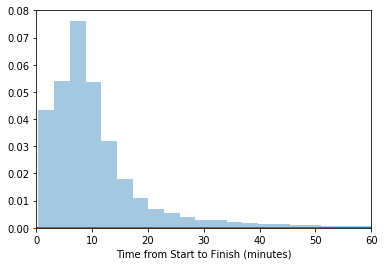

In [42]:
responses_only = multiple_choice[1:]
columns_to_keep2 = ['Time from Start to Finish (seconds)']
responses_only_duration = responses_only[columns_to_keep2]
responses_only_duration = pd.DataFrame(pd.to_numeric(responses_only_duration['Time from Start to Finish (seconds)'], errors='coerce')/60)
responses_only_duration.columns = ['Time from Start to Finish (minutes)']
responses_only_duration = responses_only_duration['Time from Start to Finish (minutes)']
sns.distplot(responses_only_duration,bins=5000).set(xlim=(0, 60))
print('Most respondents took approximately 10 minutes to complete the survey')

**2019 Kaggle Machine Learning and Data Science Survey**
* The 2019 Kaggle Machine Learning and Data Science Survey finished with 19,717 responses.

  * The 2017 Kaggle ML&DS Survey had 16,717 surveys started and 11,700 surveys completed.
  * The 2018 Kaggle ML&DS Survey had 23,859 surveys started and 14,600 surveys completed.
  * The 2019 Kaggle ML&DS Survey had 19,717 surveys started and 14,700 surveys completed.
  

* The 2019 Kaggle Machine Learning and Data Science Survey finished with 19,717 responses.  Most survey respondents took around 10 minutes to complete the survey and 15,686 respondents spent more than 5 minutes answering questions.  14,700 respondents completed the survey by answering every question that was assigned to them.  Respondents with the most experience were asked the most questions and 6,974 respondents were asked (and answered) all 34 questions.  
* Note that the answer choices were shown in a random order but the last option was typically "other" with the option to write-in text.
* The questions and responses are available in multiple_choice_responses.csv and the text responses for the "other" categories are in other_text_responses.csv (shuffled).  The suvey_schema.csv file describes which respondents received which questions and the questions_only.csv file lists all of the questions.
* Countries with fewer than 50 respondents were grouped into the category "other countries" and suspicious responses and spam responses were filtered out.